In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cnnimages/jemma.png
/kaggle/input/cnnimages/boat.png
/kaggle/input/cnnimages/soccer_ball.jpg
/kaggle/input/cnnimages/office.png
/kaggle/input/cnnimages/scotch.png
/kaggle/input/cnnimages/bmw.png
/kaggle/input/cnnimages/clint_eastwood.jpg
/kaggle/input/cnnimages/tv.png


In [2]:
# USAGE
# python classify_image.py --image images/soccer_ball.jpg --model vgg16

# import the necessary packages
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception # TensorFlow ONLY
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2

In [3]:
# define a dictionary that maps model names to their classes
# inside Keras
MODELS = {
	"vgg16": VGG16,
	"vgg19": VGG19,
	"inception": InceptionV3,
	"xception": Xception, # TensorFlow ONLY
	"resnet": ResNet50
}

In [4]:
# initialize the input image shape (224x224 pixels) along with
# the pre-processing function (this might need to be changed
# based on which model we use to classify our image)
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input



In [5]:
Network = MODELS["vgg16"]
model = Network(weights="imagenet")

553467904/553467096 [==============================] - 8s 0us/step


In [12]:
cd cnnimages

/kaggle/input/cnnimages


In [13]:
# load the input image using the Keras helper utility while ensuring
# the image is resized to `inputShape`, the required input dimensions
# for the ImageNet pre-trained network

image = load_img('soccer_ball.jpg', target_size=inputShape)
image = img_to_array(image)


In [14]:
# our input image is now represented as a NumPy array of shape
# (inputShape[0], inputShape[1], 3) however we need to expand the
# dimension by making the shape (1, inputShape[0], inputShape[1], 3)
# so we can pass it through the network
image = np.expand_dims(image, axis=0)


In [15]:
# pre-process the image using the appropriate function based on the
# model that has been loaded (i.e., mean subtraction, scaling, etc.)
image = preprocess(image)

In [16]:
# classify the image
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds)

40960/35363 [==================================] - 0s 0us/step


In [17]:
# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
	print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

1. soccer_ball: 93.43%
2. rugby_ball: 6.06%
3. golf_ball: 0.20%
4. volleyball: 0.17%
5. tennis_ball: 0.05%


In [18]:
len(P[0])

5

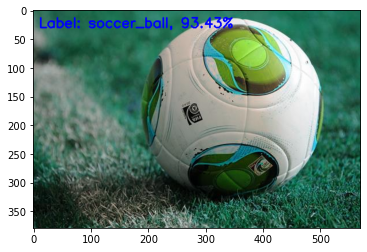

In [19]:
from matplotlib import pyplot as plt
# load the image via OpenCV, draw the top prediction on the image,
# and display the image to our screen
orig = cv2.imread('soccer_ball.jpg')
(imagenetID, label, prob) = P[0][0]
cv2.putText(orig, "Label: {}, {:.2f}%".format(label, prob * 100),
	(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
plt.imshow(orig)